In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   trans_date_trans_time  10000 non-null  object 
 2   cc_num                 10000 non-null  int64  
 3   merchant               10000 non-null  object 
 4   category               10000 non-null  object 
 5   amt                    10000 non-null  float64
 6   first                  10000 non-null  object 
 7   last                   10000 non-null  object 
 8   gender                 10000 non-null  object 
 9   street                 10000 non-null  object 
 10  city                   10000 non-null  object 
 11  state                  10000 non-null  object 
 12  zip                    10000 non-null  int64  
 13  lat                    10000 non-null  float64
 14  long                   10000 non-null  float64
 15  cit

In [5]:
df = df.drop(['Unnamed: 0','merchant','first','last','street','city','lat','long','dob','trans_num','unix_time','merch_lat','merch_long'],axis=1)

In [6]:
df['trans_date_and_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [7]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,state,zip,city_pop,job,is_fraud,trans_date_and_time
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,SC,29209,333497,Mechanical engineer,0,2020-06-21 12:14:25
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,UT,84002,302,"Sales professional, IT",0,2020-06-21 12:14:33
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,NY,11710,34496,"Librarian, public",0,2020-06-21 12:14:53
3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,FL,32780,54767,Set designer,0,2020-06-21 12:15:15
4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,MI,49632,1126,Furniture designer,0,2020-06-21 12:15:17


In [8]:
df = df.drop(['trans_date_trans_time'],axis = 1)

In [9]:
print(df.isnull().sum())

cc_num                 0
category               0
amt                    0
gender                 0
state                  0
zip                    0
city_pop               0
job                    0
is_fraud               0
trans_date_and_time    0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cc_num               10000 non-null  int64         
 1   category             10000 non-null  object        
 2   amt                  10000 non-null  float64       
 3   gender               10000 non-null  object        
 4   state                10000 non-null  object        
 5   zip                  10000 non-null  int64         
 6   city_pop             10000 non-null  int64         
 7   job                  10000 non-null  object        
 8   is_fraud             10000 non-null  int64         
 9   trans_date_and_time  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 781.4+ KB


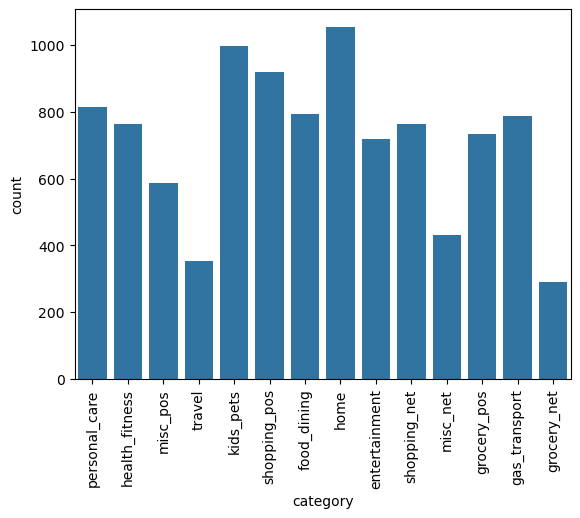

In [11]:
sns.countplot(data = df, x='category')
plt.xticks(rotation=90)
plt.show()

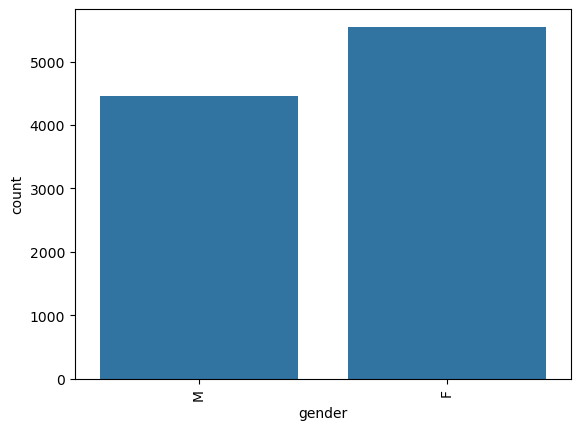

In [12]:
sns.countplot(data = df, x='gender')
plt.xticks(rotation=90)
plt.show()

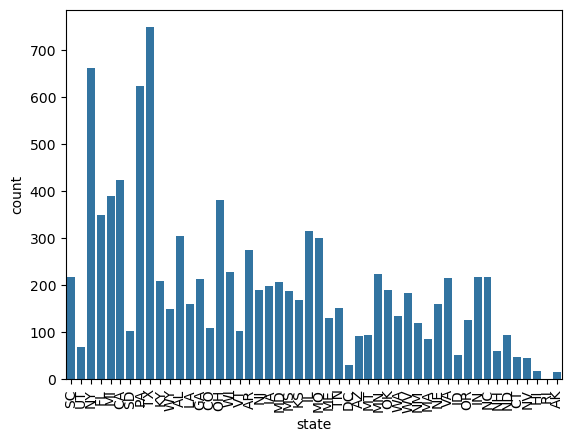

In [13]:
sns.countplot(data = df, x='state')
plt.xticks(rotation=90)
plt.show()

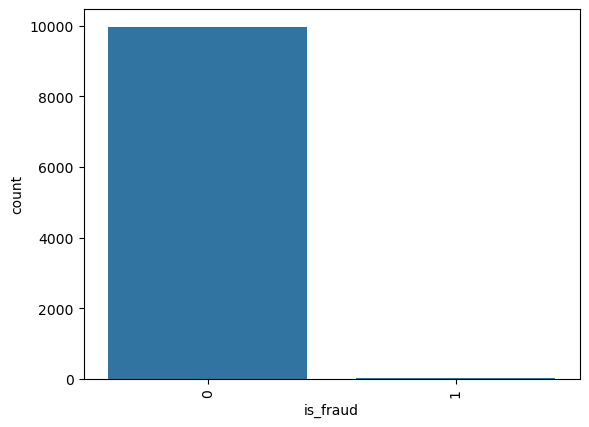

In [14]:
sns.countplot(data = df, x='is_fraud')
plt.xticks(rotation=90)
plt.show()

In [15]:
df.head()

,cc_num,category,amt,gender,state,zip,city_pop,job,is_fraud,trans_date_and_time
0,2291163933867244,personal_care,2.86,M,SC,29209,333497,Mechanical engineer,0,2020-06-21 12:14:25
1,3573030041201292,personal_care,29.84,F,UT,84002,302,"Sales professional, IT",0,2020-06-21 12:14:33
2,3598215285024754,health_fitness,41.28,F,NY,11710,34496,"Librarian, public",0,2020-06-21 12:14:53
3,3591919803438423,misc_pos,60.05,M,FL,32780,54767,Set designer,0,2020-06-21 12:15:15
4,3526826139003047,travel,3.19,M,MI,49632,1126,Furniture designer,0,2020-06-21 12:15:17


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
def extract_datetime_features(X):
    X = X.copy()
    return pd.DataFrame({
        'year': X['trans_date_and_time'].dt.year,
        'month': X['trans_date_and_time'].dt.month,
        'day': X['trans_date_and_time'].dt.day,
        'day_of_week': X['trans_date_and_time'].dt.dayofweek,
        'hour': X['trans_date_and_time'].dt.hour,
        'is_weekend': (X['trans_date_and_time'].dt.dayofweek >= 5).astype(int)})

In [18]:
datetime_transformer = Pipeline([
    ('extract', FunctionTransformer(extract_datetime_features)),
    ('scale', StandardScaler())])

In [19]:
text = ['job']
categorical = ['category','gender','state']
numeric = ['cc_num','amt','zip','city_pop']
datetime = ['trans_date_and_time']

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=500), 'job'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', StandardScaler(), numeric),
        ('datetime', datetime_transformer, datetime)
    ])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [22]:
X = df[text + categorical + numeric + datetime]
y = df['is_fraud']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [24]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=50)}

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [26]:
results = []
for name, clf in models.items():
    pipe = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=40)),
        ('classifier', clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None
    acc = np.mean(y_pred == y_test)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  F1 Score   ROC-AUC
0  Logistic Regression    0.9980  0.998332  0.999875
1        Decision Tree    0.9995  0.999464  0.875000
2        Random Forest    0.9995  0.999464  0.999875
3              XGBoost    0.9995  0.999464  0.999875


C:\Users\saswa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
best_model_name = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")


Best Model: Decision Tree


In [28]:
x_features = preprocessor.fit_transform(df)

In [29]:
from sklearn.ensemble import IsolationForest

In [30]:
iso = IsolationForest(n_estimators=200,contamination=0.02,random_state=40)
iso.fit(x_features)

IsolationForest(contamination=0.02, n_estimators=200, random_state=40)

In [31]:
anomaly_scores = iso.decision_function(x_features)
anomaly_labels = iso.predict(x_features) 

In [32]:
df['anomaly_label'] = anomaly_labels
df['anomaly_score'] = anomaly_scores

In [33]:
print(df['anomaly_label'].value_counts())
print(df[['amt', 'job', 'anomaly_label', 'anomaly_score']].head())

anomaly_label
 1    9800
-1     200
Name: count, dtype: int64
     amt                     job  anomaly_label  anomaly_score
0   2.86     Mechanical engineer              1       0.013443
1  29.84  Sales professional, IT              1       0.011973
2  41.28       Librarian, public              1       0.007777
3  60.05            Set designer              1       0.013567
4   3.19      Furniture designer              1       0.016430


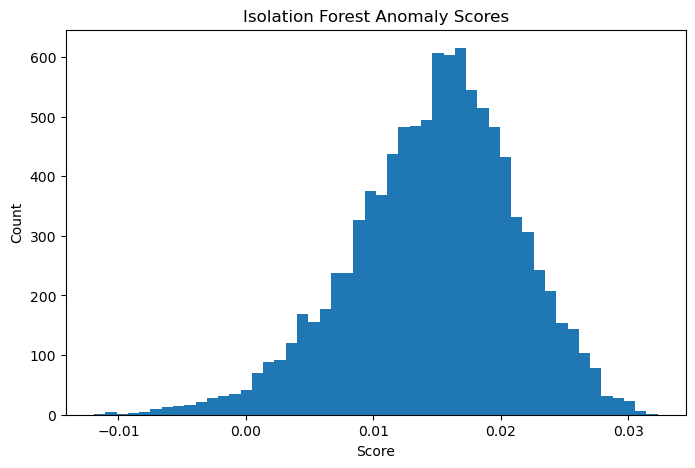

In [34]:
plt.figure(figsize=(8,5))
plt.hist(df['anomaly_score'], bins=50)
plt.title("Isolation Forest Anomaly Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [35]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

In [36]:
high_risk = (df['anomaly_label']==-1)

In [37]:
high_risk_trans = df[high_risk]

In [38]:
SMTP_SERVER = 'smtp.gmail.com'
SMTP_PORT = 587
SENDER_EMAIL = 'saswatsubidits@gmail.com'
SENDER_PASSWORD = 'fgcpidosiezumkkk'
RECEIVER_EMAIL = 'rashmirekha28@gmail.com'

In [39]:
def send_alert(transaction):
    msg = MIMEMultipart()
    msg['From'] = SENDER_EMAIL
    msg['To'] = RECEIVER_EMAIL
    msg['Subject'] = f"⚠️ High-Risk Transaction Alert: {transaction['cc_num']}"
    body = f"  High-Risk Transaction Detected: Credit card Number: {transaction['cc_num']} Amount: {transaction['amt']}Please review immediately."
    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP(SMTP_SERVER, SMTP_PORT)
        server.starttls()
        server.login(SENDER_EMAIL, SENDER_PASSWORD)
        server.send_message(msg)
        server.quit()
        print(f"Alert sent for transaction {transaction['cc_num']}")
    except Exception as e:
        print(f"Error sending email for {transaction['cc_num']}: {e}")


In [ ]:
for idx, tx in high_risk_trans.iterrows():
    send_alert(tx)